In [1]:
from matplotlib import pyplot as plt
# import b2plot as bp
# plt.style.use('belle2_modern')
# plt.style.use('belle2')


# basic setup of the notebook

import numpy as np
import pandas as pd

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

iminuit version: 2.15.2


In [2]:
# plt.style.available
# plt.style.use('belle2_modern')
px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

In [3]:
from hist.get_data import get_data

Welcome to JupyROOT 6.26/04


In [4]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe
from matplotlib import pyplot as plt
import numpy as np
from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon
# from scipy.stats import truncnorm

In [5]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

In [6]:
def signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return s, func

In [7]:
def extended_bin_signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return func

In [8]:
def gauss_signal_crystalball(x, s1, s2, beta, m, loc, scale, mu, sigma):
    func = s1 * crystalball.pdf(x, beta, m, loc, scale) + s2*truncnorm.pdf(x,*xr, mu, sigma)
    return s1+s2, func

In [9]:
from hist.get_data import get_data_in_np

In [10]:
def extended_gauss_crystalball(x, s1, s2, alpha, n, CB_mu, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, CB_mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [11]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

# Extract Data

In [12]:
# general_file = '/media/jykim/ssd_T5/storage/01_recon/vector/v2_extraction_expert_E_0_3_signalMC_recon_mdst_vector.root'


general_file = '/media/jykim/ssd_T5/storage/01_recon/vector/train_v2_extraction_pi0veto_signalMC_recon_mdst_vector.root'

In [13]:
variables=['D0_M']

In [14]:
phi_file = general_file.replace("vector","phi")
rho_file = general_file.replace("vector","rho")
antiKstar_file = general_file.replace("vector","antiKstar")
omega_file = general_file.replace("vector","omega")

In [15]:
base_filter = 'Pis_charge==1'


base_omega_plus_filter = 'omega_rank_Dstp==1'

In [16]:
half_1M_1_phi = get_data_in_np(file=phi_file, tree='phi', base_filter=base_filter,variables=variables)
half_1M_1_rho = get_data_in_np(file=rho_file, tree='rho', base_filter=base_filter,variables=variables)
half_1M_1_antiKstar = get_data_in_np(file=antiKstar_file, tree='antiKstar', base_filter=base_filter,variables=variables)
half_1M_1_omega = get_data_in_np(file=omega_file, tree='omega', base_filter=base_omega_plus_filter,variables=variables)

In [17]:
df_describe = pd.DataFrame(half_1M_1_phi)
df_describe.describe()


,D0_M
count,38289.000000
mean,1.858395
std,0.021599
min,1.666544
25%,1.849706
50%,1.861033
75%,1.870583
max,2.064014


# After pi0 veto ( CB + Gaussian )

## Extended unbinned MLE

In [18]:
PDF = same_mu_extended_gauss_crystalball

### phi

In [19]:
mode = 'phi'
half_1M_1_phi = get_data(file=phi_file, tree='phi', base_filter=None,variables=variables)
dataset = half_1M_1_phi['D0_M']

In [20]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=3000, alpha=1, n=9, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [21]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.305e+05                 │              Nfcn = 280              │
│ EDM = 0.000132 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.45e3  │  0.20e3   │            │            │    0    │         │       │
│ 1 │ s2       │    860    │    70     │            │            │    0    │         │       │
│ 2 │ alpha    │   1.006   │   0.025   │            │            │    0    │         │       │
│ 3 │ n        │    9.2    │    1.1    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0689   │  0.0033   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.15e+04 -3.68e+03    0.0233     -5.82   0.00199  0.000154    0.0821 │
│       s2 │ -3.68e+03  4.54e+03    -0.162      8.36  -0.00219  0.000334    -0.076 │
│    alpha │    0.0233    -0.162  0.000615   -0.0229   1.5e-06 -1.93e-06 -2.65e-05 │
│        n │     -5.82      8.36   -0.0229       1.2 -3.21e-05  5.04e-05   0.00187 │
│ CB_sigma │   0.00199  -0.00219   1.5e-06 -3.21e-05  9.97e-09  -7.3e-09  3.28e-08 │
│       mu │  0.000154  0.000334 -1.93e-06  5.04e-05  -7.3e-09  1.38e-08  3.54e-08 │
│    sigma │    0.0821    -0.076 -2.65e-05   0.00187  3.28e-08  3.54e-08  1.08e-05 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [22]:
m.interactive()

In [738]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.305e+05                 │             Nfcn = 1335              │
│ EDM = 0.000132 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.45e3  │  0.20e3   │  -0.20e3   │   0.20e3   │    0    │         │       │
│ 1 │ s2       │    860    │    70     │    -70     │     70     │    0    │         │       │
│ 2 │ alpha    │   1.006   │   0.025   │   -0.024   │   0.025    │    0    │         │       │
│ 3 │ n        │    9.2    │    1.1    │    -1.0    │    1.3     │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0689   │  0.0033   │  -0.0034   │   0.0032   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.2e3   │   0.2e3   │    -70    │    70     │  -0.024   │   0.025   │   -1.0    │    1.3    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.12e-3  │  -0.0034  │  0.0032   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.15e+04 -3.68e+03    0.0233     -5.82   0.00199  0.000154    0.0821 │
│       s2 │ -3.68e+03  4.54e+03    -0.162      8.36  -0.00219  0.000334  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


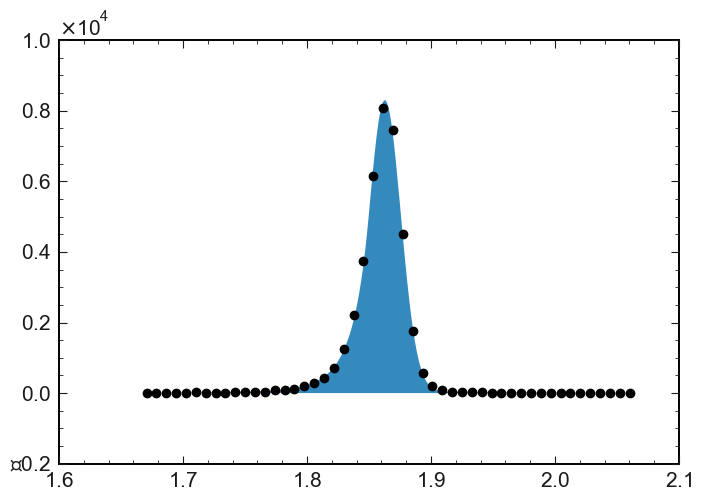

In [739]:
COST.visualize(m.values)

In [740]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/half_1M_1_vector_after_pi0veto.png'

In [741]:
this_plot_location = general_plot_location.replace("vector",mode)


In [742]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 38310
s1 + s2 = 37451.97740251737 + 858.80326862414 = 38310.78067114151


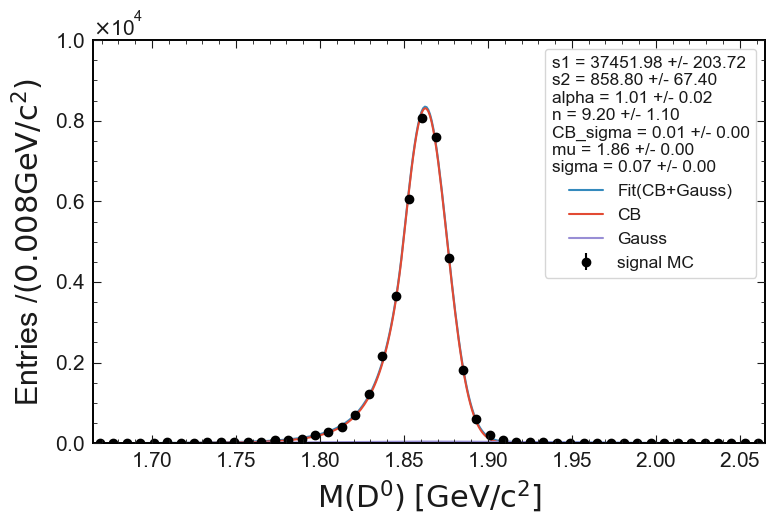

In [743]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="Fit(CB+Gauss)")


# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")

plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma'] ) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [28]:
len(xe)

51

### rho

In [29]:
mode = 'rho'
dataset = half_1M_1_rho['D0_M']

In [30]:
df_describe = pd.DataFrame(half_1M_1_rho)
df_describe.describe()

,D0_M
count,65307.000000
mean,1.856203
std,0.029321
min,1.665198
25%,1.845809
50%,1.859820
75%,1.871211
max,2.064887


In [31]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=62000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [32]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.624e+06                 │              Nfcn = 329              │
│ EDM = 0.000103 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  62.44e3  │  0.22e3   │            │            │    0    │         │       │
│ 1 │ s2       │  2.87e3   │  0.11e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.010   │   0.017   │            │            │    0    │         │       │
│ 3 │ n        │    7.2    │    0.4    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 15.20e-3  │  0.09e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86188  │  0.00011  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0855   │  0.0016   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.98e+04 -8.64e+03    0.0295      1.37   0.00503  -0.00208    0.0671 │
│       s2 │ -8.64e+03  1.24e+04    -0.177      10.5  -0.00299  0.000471   -0.0608 │
│    alpha │    0.0295    -0.177  0.000303  -0.00606  1.04e-06 -1.23e-06 -3.35e-06 │
│        n │      1.37      10.5  -0.00606      0.19  -1.4e-05   1.8e-05  0.000184 │
│ CB_sigma │   0.00503  -0.00299  1.04e-06  -1.4e-05  8.42e-09 -5.98e-09  2.02e-08 │
│       mu │  -0.00208  0.000471 -1.23e-06   1.8e-05 -5.98e-09  1.13e-08  2.49e-09 │
│    sigma │    0.0671   -0.0608 -3.35e-06  0.000184  2.02e-08  2.49e-09  2.64e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [33]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.624e+06                 │             Nfcn = 1728              │
│ EDM = 0.000103 (Goal: 0.0002)    │            time = 1.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  62.44e3  │  0.22e3   │  -0.27e3   │   0.27e3   │    0    │         │       │
│ 1 │ s2       │  2.87e3   │  0.11e3   │  -0.11e3   │   0.12e3   │    0    │         │       │
│ 2 │ alpha    │   1.010   │   0.017   │   -0.018   │   0.018    │    0    │         │       │
│ 3 │ n        │    7.2    │    0.4    │    -0.4    │    0.5     │    0    │   50    │       │
│ 4 │ CB_sigma │ 15.20e-3  │  0.09e-3  │  -0.09e-3  │  0.09e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86188  │  0.00011  │  -0.00011  │  0.00011   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0855   │  0.0016   │  -0.0017   │   0.0016   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.27e3  │  0.27e3   │  -0.11e3  │  0.12e3   │  -0.017   │   0.018   │   -0.4    │    0.5    │ -0.09e-3  │  0.09e-3  │ -0.11e-3  │  0.11e-3  │  -0.0017  │  0.0016   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.98e+04 -8.64e+03    0.0295      1.37   0.00503  -0.00208    0.0671 │
│       s2 │ -8.64e+03  1.24e+04    -0.177      10.5  -0.00299  0.000471  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


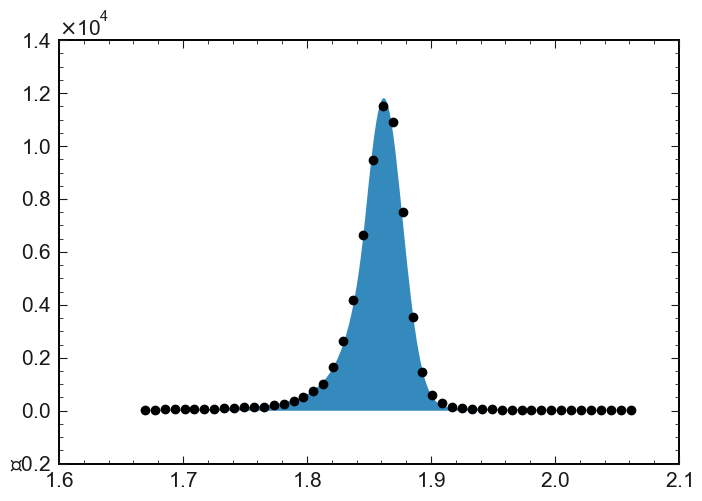

In [34]:
COST.visualize(m.values)

In [35]:
this_plot_location = general_plot_location.replace("vector",mode)


In [36]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 65307
s1 + s2 = 62437.18933740196 + 2867.783642763026 = 65304.97298016498


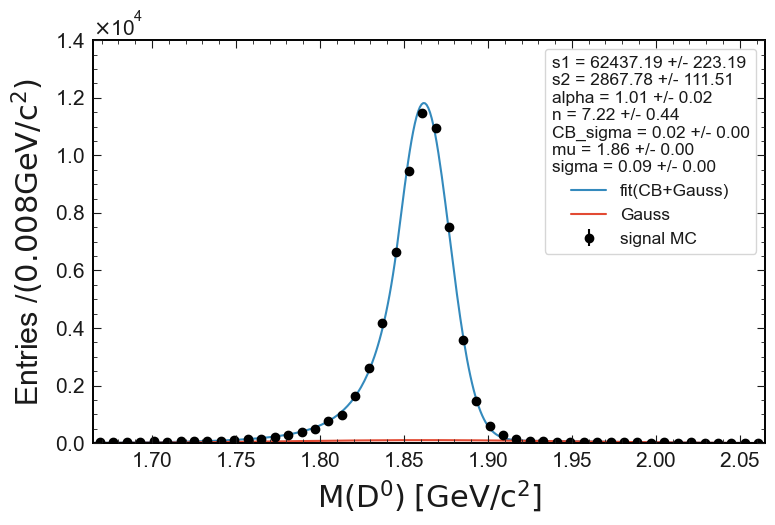

In [37]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### antiKstar

In [38]:
mode = 'antiKstar'
dataset = half_1M_1_antiKstar['D0_M']

In [39]:
df_describe = pd.DataFrame(half_1M_1_antiKstar)
df_describe.describe()

,D0_M
count,50180.000000
mean,1.857291
std,0.025005
min,1.667223
25%,1.847342
50%,1.860321
75%,1.870917
max,2.064459


In [40]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=50000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [41]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.232e+06                 │              Nfcn = 222              │
│ EDM = 0.000303 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  48.65e3  │  0.23e3   │            │            │    0    │         │       │
│ 1 │ s2       │  1.53e3   │  0.09e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.029   │   0.022   │            │            │    0    │         │       │
│ 3 │ n        │    8.8    │    0.9    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 14.59e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86198  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0769   │  0.0023   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  5.35e+04 -6.52e+03      0.33     -19.4   0.00308 -0.000992    0.0689 │
│       s2 │ -6.52e+03  8.03e+03    -0.211      14.9  -0.00283  0.000315   -0.0787 │
│    alpha │      0.33    -0.211  0.000503   -0.0158  1.42e-06 -1.74e-06 -1.15e-05 │
│        n │     -19.4      14.9   -0.0158     0.731 -2.79e-05  3.89e-05  0.000699 │
│ CB_sigma │   0.00308  -0.00283  1.42e-06 -2.79e-05  1.02e-08 -7.16e-09  2.69e-08 │
│       mu │ -0.000992  0.000315 -1.74e-06  3.89e-05 -7.16e-09  1.35e-08  1.93e-08 │
│    sigma │    0.0689   -0.0787 -1.15e-05  0.000699  2.69e-08  1.93e-08  5.26e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [42]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.232e+06                 │             Nfcn = 1576              │
│ EDM = 0.000303 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  48.65e3  │  0.23e3   │  -0.23e3   │   0.23e3   │    0    │         │       │
│ 1 │ s2       │  1.53e3   │  0.09e3   │  -0.09e3   │   0.09e3   │    0    │         │       │
│ 2 │ alpha    │   1.029   │   0.022   │   -0.022   │   0.023    │    0    │         │       │
│ 3 │ n        │    8.8    │    0.9    │    -0.8    │    1.0     │    0    │   50    │       │
│ 4 │ CB_sigma │ 14.59e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86198  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0769   │  0.0023   │  -0.0022   │   0.0023   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.23e3  │  0.23e3   │    -90    │    90     │  -0.022   │   0.023   │   -0.8    │    1.0    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.12e-3  │  -0.0022  │  0.0023   │
│  Valid   │   True    │   False   │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  5.35e+04 -6.52e+03      0.33     -19.4   0.00308 -0.000992    0.0689 │
│       s2 │ -6.52e+03  8.03e+03    -0.211      14.9  -0.00283  0.000315  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


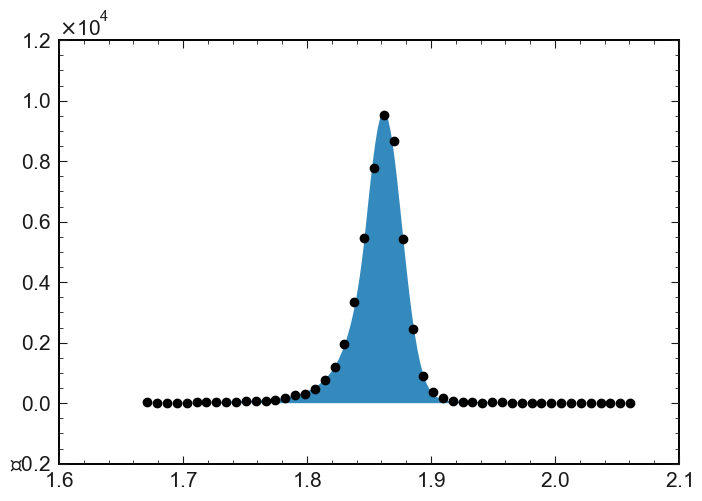

In [43]:
COST.visualize(m.values)

In [44]:
this_plot_location = general_plot_location.replace("vector",mode)


In [45]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 50180
s1 + s2 = 48650.67474705255 + 1529.1258777823305 = 50179.80062483488


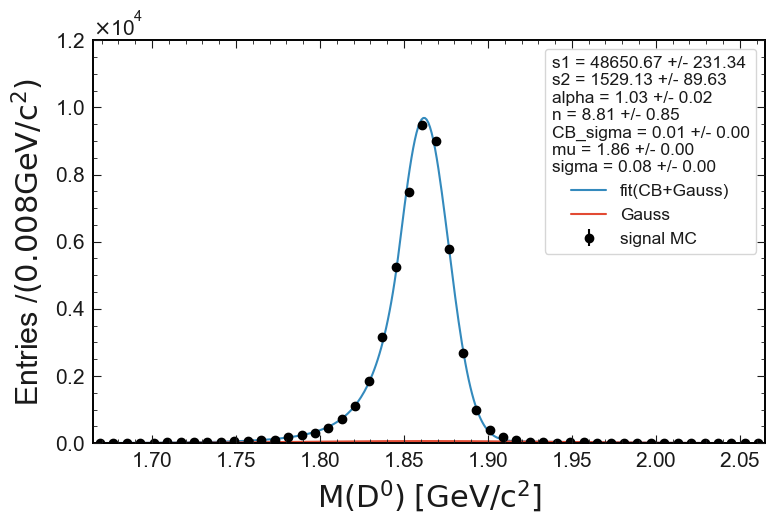

In [46]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### omega

In [47]:
mode = 'omega'
dataset = half_1M_1_omega['D0_M']

In [48]:
df_describe = pd.DataFrame(half_1M_1_omega)
df_describe.describe()

,D0_M
count,28012.000000
mean,1.855199
std,0.031490
min,1.665790
25%,1.842701
50%,1.858218
75%,1.871299
max,2.063333


In [49]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=25000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [50]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.422e+05                 │              Nfcn = 293              │
│ EDM = 0.000519 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  26.24e3  │  0.18e3   │            │            │    0    │         │       │
│ 1 │ s2       │  1.77e3   │  0.10e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.01    │   0.04    │            │            │    0    │         │       │
│ 3 │ n        │   12.3    │    3.5    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 17.40e-3  │  0.17e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86028  │  0.00019  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0822   │  0.0020   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  3.24e+04 -7.72e+03     0.737      -105   0.00494  -0.00084    0.0721 │
│       s2 │ -7.72e+03  9.71e+03    -0.798       114  -0.00547   0.00111   -0.0696 │
│    alpha │     0.737    -0.798   0.00153    -0.122  4.29e-06 -5.05e-06 -1.95e-05 │
│        n │      -105       114    -0.122      12.4 -0.000244  0.000288   0.00228 │
│ CB_sigma │   0.00494  -0.00547  4.29e-06 -0.000244  2.89e-08 -2.13e-08     3e-08 │
│       mu │  -0.00084   0.00111 -5.05e-06  0.000288 -2.13e-08  3.73e-08  2.14e-08 │
│    sigma │    0.0721   -0.0696 -1.95e-05   0.00228     3e-08  2.14e-08  4.08e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [51]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.422e+05                 │             Nfcn = 1963              │
│ EDM = 0.000519 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  26.24e3  │  0.18e3   │  -0.18e3   │   0.18e3   │    0    │         │       │
│ 1 │ s2       │  1.77e3   │  0.10e3   │  -0.09e3   │   0.10e3   │    0    │         │       │
│ 2 │ alpha    │   1.007   │   0.039   │   -0.029   │   0.030    │    0    │         │       │
│ 3 │ n        │   12.3    │    3.5    │    -2.0    │    3.0     │    0    │   50    │       │
│ 4 │ CB_sigma │ 17.40e-3  │  0.17e-3  │  -0.16e-3  │  0.16e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86028  │  0.00019  │  -0.00019  │  0.00019   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0822   │  0.0020   │  -0.0020   │   0.0020   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.18e3  │  0.18e3   │    -90    │    100    │  -0.029   │   0.030   │    -2     │     3     │ -0.16e-3  │  0.16e-3  │ -0.19e-3  │  0.19e-3  │  -0.002   │   0.002   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  3.24e+04 -7.72e+03     0.737      -105   0.00494  -0.00084    0.0721 │
│       s2 │ -7.72e+03  9.71e+03    -0.798       114  -0.00547   0.00111  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


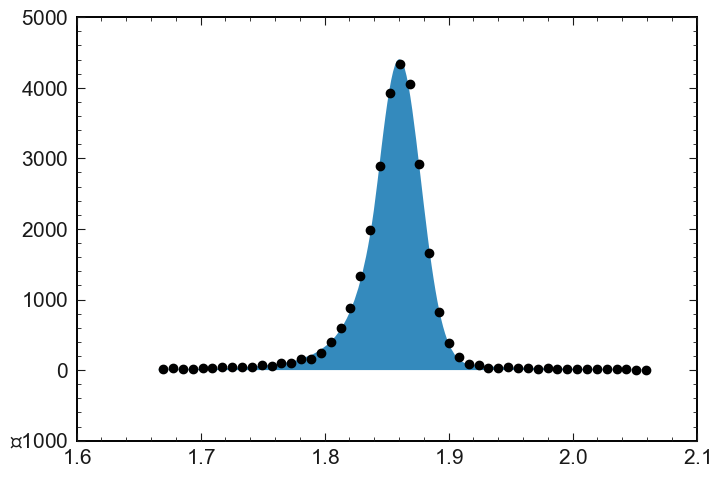

In [52]:
COST.visualize(m.values)

In [53]:
this_plot_location = general_plot_location.replace("vector",mode)


In [54]:
this_plot_location

'/home/jykim/nas/plots/signalMC/omega/half_1M_1_omega_after_pi0veto.png'

In [55]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 28012
s1 + s2 = 26237.74121513926 + 1774.019844314625 = 28011.761059453886


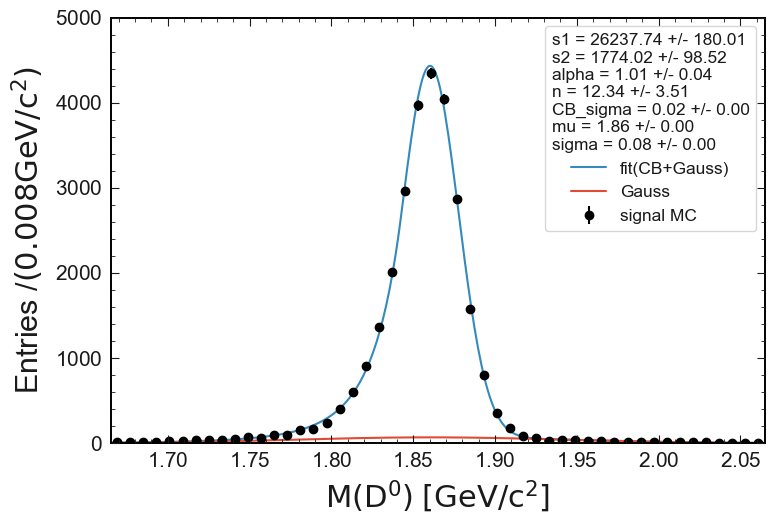

In [56]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# After pi0 veto ( CB )

## Unbinned

In [215]:
def crystalball_pdf(x, alpha, n, CB_mu, CB_sigma):
    
    return crystalball.pdf(x, alpha, n, CB_mu, CB_sigma)



In [216]:


# PDF = unbinned_crystalball_pdf

In [217]:
# crystalball.pdf(x, alpha, n, CB_mu, CB_sigma)

In [218]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

### phi (CB)

In [219]:
# half_1M_1_phi = get_data(file=phi_file, tree='phi', base_filter=base_filter,variables=variables)

In [239]:
mode = 'phi'
dataset = pd.DataFrame(half_1M_1_phi)
dataset = dataset[(dataset['D0_M'] > 1.77) & (dataset['D0_M'] < 1.93)  ]['D0_M']

In [240]:
dataset.to_numpy()

array([1.87958336, 1.86690187, 1.85199547, ..., 1.8513068 , 1.86122262,
       1.86981761])

In [241]:
# PDF = crystalball_pdf

PDF = signal_crystalball

In [242]:
# del m

In [243]:
# COST = cost.UnbinnedNLL(dataset, PDF)

COST = cost.ExtendedUnbinnedNLL(dataset, PDF)

# m = Minuit(COST ,alpha=0.95, n=70, CB_mu=1.86,CB_sigma=0.012)

m = Minuit(COST, s=38000 ,alpha=0.95, n=70, CB_mu=1.86,CB_sigma=0.012)

In [244]:
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,5)
m.limits["CB_sigma"]=(0, 0.1)

m.limits["CB_mu"]=(1.80,1.90)

m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.251e+05                 │              Nfcn = 179              │
│ EDM = 8.84e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  37.96e3  │  0.20e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.949   │   0.020   │            │            │    0    │    5    │       │
│ 2 │ n        │    70     │    40     │            │            │    0    │         │       │
│ 3 │ CB_mu    │  1.86263  │  0.00011  │            │            │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │ 13.78e-3  │  0.09e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │   3.8e+04   0.00242     -6.44 -8.43e-06   2.9e-06 │
│    alpha │   0.00242  0.000394    -0.718 -1.36e-06  1.01e-06 │
│        n │     -6.44    -0.718  1.97e+03   0.00156 -0.000849 │
│    CB_mu │ -8.43e-06 -1.36e-06   0.00156  1.29e-08 -5.92e-09 │
│ CB_sigma │   2.9e-06  1.01e-06 -0.000849 -5.92e-09  7.47e-09 │
└──────────┴───────────────────────────────────────────────────┘

In [245]:
m.interactive()

In [246]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.251e+05                 │              Nfcn = 786              │
│ EDM = 8.84e-06 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  37.96e3  │  0.19e3   │  -0.19e3   │   0.20e3   │    0    │         │       │
│ 1 │ alpha    │   0.949   │   0.020   │   -0.020   │   0.020    │    0    │    5    │       │
│ 2 │ n        │    69     │    44     │    -28     │     44     │    0    │         │       │
│ 3 │ CB_mu    │  1.86263  │  0.00011  │  -0.00011  │  0.00012   │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │ 13.78e-3  │  0.09e-3  │  -0.09e-3  │  0.09e-3   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           s           │         alpha         │           n           │         CB_mu         │       CB_sigma        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.19e3  │  0.20e3   │   -0.02   │   0.02    │    -28    │    44     │ -0.12e-3  │  0.12e-3  │ -0.09e-3  │  0.09e-3  │
│  Valid   │   True    │   True    │   False   │   False   │   True    │   False   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │   3.8e+04   0.00242     -6.44 -8.43e-06   2.9e-06 │
│    alpha │   0.00242  0.000394    -0.718 -1.36e-06  1.01e-06 │
│        n │     -6.44    -0.718  1.97e+03   0.00156 -0.000849 │
│    CB_mu │ -8.43e-06 -1.36e-06   0.00156  1.29e-08 -5.92e-09 │
│ CB_sigma │   2.9e-06  1.01e-06 -0.000849 -5.92e-09  7.47e-09 │
└──────────┴───────────────────────────────────────────────────┘

In [247]:
m.values

<ValueView s=37959.997011866195 alpha=0.9485126747037234 n=69.33923834788538 CB_mu=1.8626288491713896 CB_sigma=0.013779128558482767>

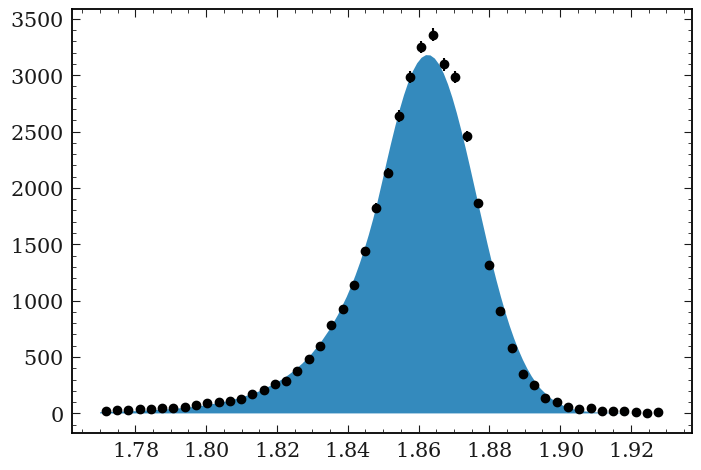

In [248]:
COST.visualize(m.values)

In [249]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/CB_half_1M_1_vector_after_pi0veto.png'

In [250]:
this_plot_location = general_plot_location.replace("vector",mode)


In [251]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

In [252]:
# crystalball.pdf([1.7,1.86,2.0], *m.values)


In [253]:
plt.style.use('belle2_serif')

true entries = 37960


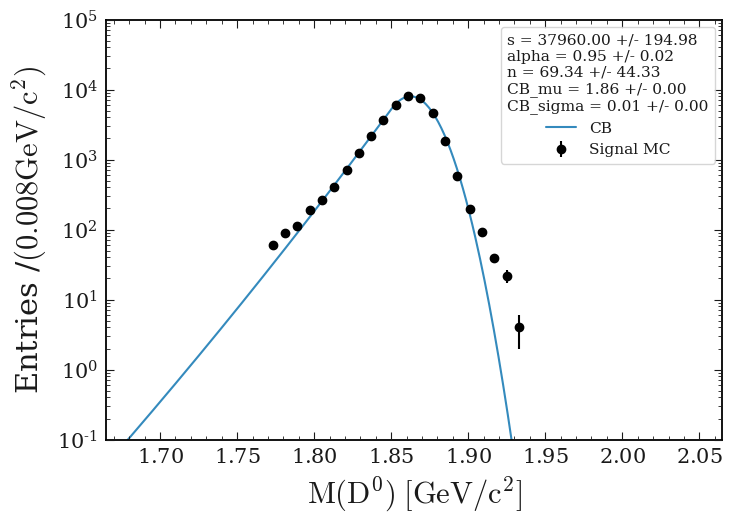

In [257]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="Signal MC")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [214]:
test = pd.DataFrame(half_1M_1_phi)
test.describe()

,D0_M
count,38289.000000
mean,1.858395
std,0.021599
min,1.666544
25%,1.849706
50%,1.861033
75%,1.870583
max,2.064014


In [213]:
small_test = test[test['D0_M']<1.75]
small_test.describe()

,D0_M
count,143.000000
mean,1.719412
std,0.024267
min,1.666544
25%,1.701289
50%,1.724717
75%,1.741889
max,1.749658


In [212]:
big_test = test[test['D0_M']>1.93]
big_test.describe()

,D0_M
count,93.000000
mean,1.969833
std,0.038702
min,1.930198
25%,1.939055
50%,1.955678
75%,1.990997
max,2.064014


### phi (CB + Gaussian)

In [91]:
def unbinned_crystalball_pdf(x, z, alpha, n, mu, CB_sigma, sigma):
    
    func = z * crystalball.pdf(x, alpha, n, mu, CB_sigma) + (1-z) * norm.pdf(x, mu, sigma)
    
    return func

In [92]:
dataset = half_1M_1_phi['D0_M']

In [93]:
PDF = unbinned_crystalball_pdf

mode = 'phi'
# dataset = half_1M_1_phi['D0_M']

COST = cost.UnbinnedNLL(dataset, PDF)
m = Minuit(COST, z=0.70, alpha=1.01,n=15, mu=1.86,CB_sigma=0.02, sigma=0.02)

In [94]:
m.limits["n"]=(0,500)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.limits["z"]=(0,1)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.984e+05                 │              Nfcn = 393              │
│ EDM = 1.47e-05 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z        │  0.9775   │  0.0017   │            │            │    0    │    1    │       │
│ 1 │ alpha    │   1.005   │   0.023   │            │            │    0    │         │       │
│ 2 │ n        │    9.3    │    1.0    │            │            │    0    │   500   │       │
│ 3 │ mu       │  1.86272  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ sigma    │  0.0687   │  0.0032   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────┐
│          │         z     alpha         n        mu  CB_sigma     sigma │
├──────────┼─────────────────────────────────────────────────────────────┤
│        z │  3.08e-06  2.94e-06 -0.000215 -5.99e-09  5.02e-08  2.06e-06 │
│    alpha │  2.94e-06  0.000539   -0.0196 -1.75e-06  1.38e-06 -2.11e-05 │
│        n │ -0.000215   -0.0196       1.1  4.24e-05 -2.55e-05   0.00164 │
│       mu │ -5.99e-09 -1.75e-06  4.24e-05  1.36e-08 -7.13e-09  2.57e-08 │
│ CB_sigma │  5.02e-08  1.38e-06 -2.55e-05 -7.13e-09  9.86e-09  3.84e-08 │
│    sigma │  2.06e-06 -2.11e-05   0.00164  2.57e-08  3.84e-08  1.04e-05 │
└──────────┴─────────────────────────────────────────────────────────────┘

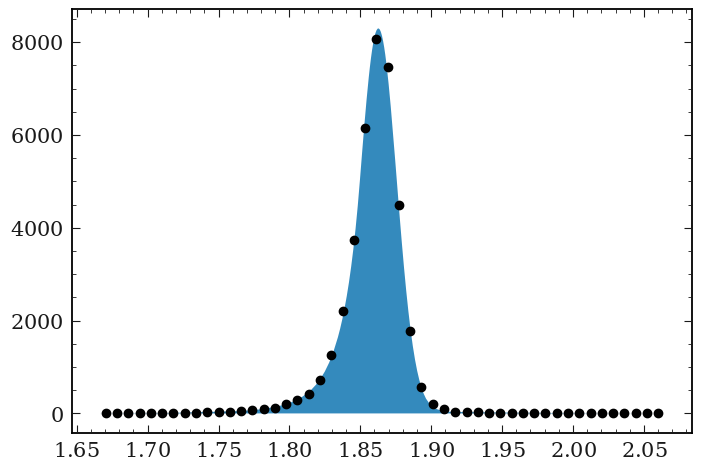

In [95]:
COST.visualize(m.values)

In [96]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.984e+05                 │             Nfcn = 1149              │
│ EDM = 1.47e-05 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z        │  0.9775   │  0.0018   │  -0.0018   │   0.0017   │    0    │    1    │       │
│ 1 │ alpha    │   1.005   │   0.023   │   -0.025   │   0.024    │    0    │         │       │
│ 2 │ n        │    9.3    │    1.0    │    -1.0    │    1.3     │    0    │   500   │       │
│ 3 │ mu       │  1.86272  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ sigma    │  0.0687   │  0.0032   │  -0.0033   │   0.0033   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           z           │         alpha         │           n           │          mu           │       CB_sigma        │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0018  │  0.0017   │  -0.025   │   0.024   │   -1.0    │    1.3    │ -0.12e-3  │  0.12e-3  │  -0.1e-3  │  0.1e-3   │  -0.0033  │  0.0033   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬─────────────────────────────────────────────────────────────┐
│          │         z     alpha         n        mu  CB_sigma     sigma │
├──────────┼─────────────────────────────────────────────────────────────┤
│        z │  3.08e-06  2.94e-06 -0.000215 -5.99e-09  5.02e-08  2.06e-06 │
│    alpha │  2.94e-06  0.000539   -0.0196 -1.75e-06  1.38e-06 -2.11e-05 │
│        n │ -0.000215   -0.0196       1.1  4.24e-05 -2.55e-05   0.00164 │
│       mu │ -5.99e-09 -1.75e-06  4.24e-05  1.36e-08 -7.13e-09  2.57e-08 │
│ CB_sigma │  5.02e-08  1.38e-06 -2.55e-05 -7.13e-09  9.86e-09  3.84e-08 │
│    sigma │  2.06e-06 -2.11e-05   0.00164  2.57e-08  3.84e-08  1.04e-05 │
└──────────┴──────────────────────────────────────

In [97]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/Gauss_CB_half_1M_1_vector_after_pi0veto.png'

In [98]:
this_plot_location = general_plot_location.replace("vector",mode)


In [99]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 38289


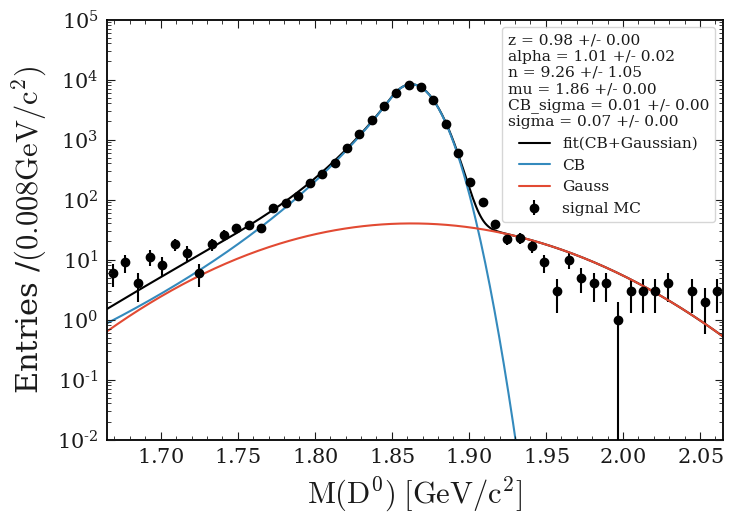

In [107]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2_serif')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, unbinned_crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB+Gaussian)",color="black")


plt.plot(xm, m.values['z'] * crystalball.pdf(xm, m.values["alpha"], m.values["n"], m.values["mu"], m.values["CB_sigma"])* len(dataset) * dx[0],label="CB")

plt.plot(xm, (1-m.values['z']) * norm.pdf(xm, m.values['mu'], m.values['sigma'])* len(dataset) * dx[0],label="Gauss")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
ax.set_ylim(1e-2,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)
plt.yscale("log")
print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [89]:
dataset.describe()

count    38310.000000
mean         1.858386
std          0.021628
min          1.666544
25%          1.849702
50%          1.861035
75%          1.870583
max          2.064014
Name: D0_M, dtype: float64

In [90]:

half_1M_1_phi = get_data(file=phi_file, tree='phi', base_filter=None,variables=variables)

test = half_1M_1_phi[half_1M_1_phi['D0_M']<1.93]
test.describe()

,D0_M
count,38217.000000
mean,1.858115
std,0.020857
min,1.666544
25%,1.849674
50%,1.860975
75%,1.870508
max,1.929304


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


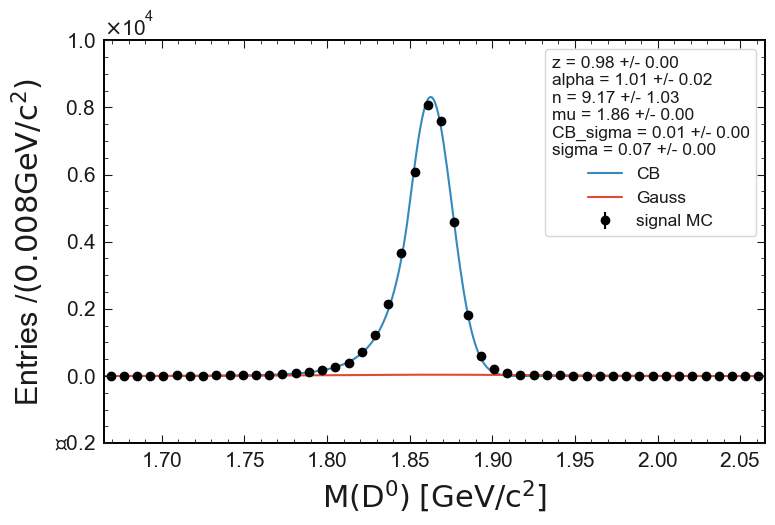

In [81]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, unbinned_crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB+Gaussian)")


plt.plot(xm, len(dataset) * m.values['z'] * crystalball.pdf(xm, m.values["alpha"], m.values["n"], m.values["mu"], m.values["CB_sigma"]) * dx[0],label="CB")

plt.plot(xm, len(dataset) * (1-m.values['z'])* norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
# ax.set_ylim(0,None)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
# plt.yscale("log")
plt.tight_layout()

SyntaxError: invalid syntax (1500865892.py, line 1)

### rho (CB)

In [38]:
rho_variables = ['D0_M','__candidate__']
base_filter = '__candidate__==0'
half_1M_1_rho = get_data(file=rho_file, tree='rho', base_filter=base_filter,variables=variables)

In [39]:
mode = 'rho'
dataset = pd.DataFrame(half_1M_1_rho)
dataset = dataset[(dataset['D0_M'] > 1.77) & (dataset['D0_M'] < 1.92)  ]['D0_M']

In [40]:
dataset.describe()

count    63067.000000
mean         1.857343
std          0.021217
min          1.770003
25%          1.846636
50%          1.860011
75%          1.871073
max          1.919980
Name: D0_M, dtype: float64

In [41]:
# PDF = crystalball_pdf

PDF = signal_crystalball

In [42]:
# COST = cost.UnbinnedNLL(dataset, PDF)
# m = Minuit(COST, alpha=1.006, n=50, CB_mu=1.86,CB_sigma=0.012)

COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=63700,alpha=0.93, n=100, CB_mu=1.86,CB_sigma=0.016)

In [43]:
# m.limits["n"]=(0,300)
# m.limits["alpha"]=(0,5)
# m.limits["CB_sigma"]=(0, 0.1)
# m.limits["CB_mu"]=(1.80,1.90)

# m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.582e+06                 │              Nfcn = 131              │
│ EDM = 3.29e-05 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  63.07e3  │  0.25e3   │            │            │         │         │       │
│ 1 │ alpha    │   0.924   │   0.009   │            │            │         │         │       │
│ 2 │ n        │ 130.1010  │  0.0023   │            │            │         │         │       │
│ 3 │ CB_mu    │  1.86186  │  0.00010  │            │            │         │         │       │
│ 4 │ CB_sigma │ 15.94e-3  │  0.08e-3  │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  6.32e+04  6.42e-05   -0.0213 -3.65e-07  2.52e-06 │
│    alpha │  6.42e-05  8.06e-05   2.3e-08 -6.06e-07  5.26e-07 │
│        n │   -0.0213   2.3e-08  5.43e-06 -6.82e-11  1.28e-10 │
│    CB_mu │ -3.65e-07 -6.06e-07 -6.82e-11  1.02e-08 -4.78e-09 │
│ CB_sigma │  2.52e-06  5.26e-07  1.28e-10 -4.78e-09  6.28e-09 │
└──────────┴───────────────────────────────────────────────────┘

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


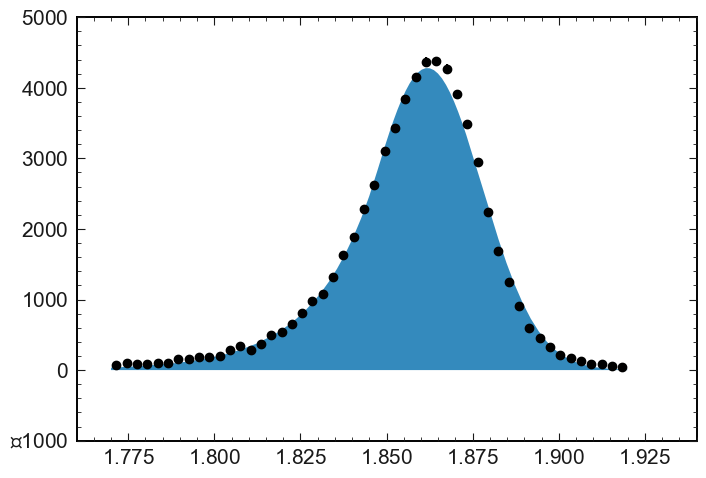

In [44]:
COST.visualize(m.values)

In [45]:
m.interactive()

In [46]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.582e+06                 │              Nfcn = 962              │
│ EDM = 3.29e-05 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  63.07e3  │  0.25e3   │  -0.25e3   │   0.25e3   │         │         │       │
│ 1 │ alpha    │   0.924   │   0.009   │   -0.009   │   0.009    │         │         │       │
│ 2 │ n        │ 130.1010  │  0.0023   │  -0.0023   │   0.0023   │         │         │       │
│ 3 │ CB_mu    │  1.86186  │  0.00010  │  -0.00010  │  0.00010   │         │         │       │
│ 4 │ CB_sigma │ 15.94e-3  │  0.08e-3  │  -0.08e-3  │  0.08e-3   │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           s           │         alpha         │           n           │         CB_mu         │       CB_sigma        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.25e3  │  0.25e3   │  -0.009   │   0.009   │  -0.0023  │  0.0023   │  -0.1e-3  │  0.1e-3   │ -0.08e-3  │  0.08e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   False   │   False   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  6.32e+04  6.42e-05   -0.0213 -3.65e-07  2.52e-06 │
│    alpha │  6.42e-05  8.06e-05   2.3e-08 -6.06e-07  5.26e-07 │
│        n │   -0.0213   2.3e-08  5.43e-06 -6.82e-11  1.28e-10 │
│    CB_mu │ -3.65e-07 -6.06e-07 -6.82e-11  1.02e-08 -4.78e-09 │
│ CB_sigma │  2.52e-06  5.26e-07  1.28e-10 -4.78e-09  6.28e-09 │
└──────────┴───────────────────────────────────────────────────┘

In [47]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/CB_half_1M_1_vector_after_pi0veto.png'

In [48]:
this_plot_location = general_plot_location.replace("vector",mode)


In [49]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 63067


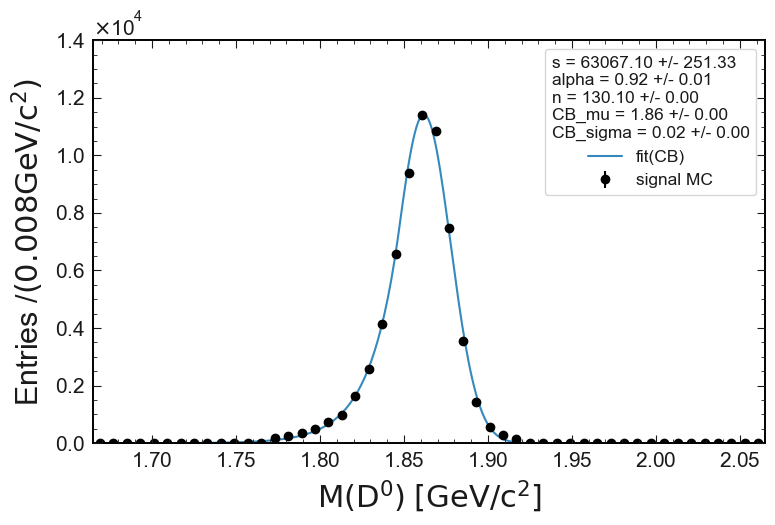

In [50]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, signal_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")
# plt.plot(xm, crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")

plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB)")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### antiKstar (CB)

In [51]:
half_1M_1_antKstar = get_data(file=antiKstar_file, tree='antiKstar', base_filter=None,variables=variables)

In [52]:
mode = 'antiKstar'
dataset = pd.DataFrame(half_1M_1_antiKstar)
dataset = dataset[(dataset['D0_M'] > 1.77) & (dataset['D0_M'] < 1.92)  ]['D0_M']

dataset.describe()

count    49426.000000
mean         1.857921
std          0.020108
min          1.770047
25%          1.847738
50%          1.860407
75%          1.870856
max          1.919924
Name: D0_M, dtype: float64

In [53]:
# PDF = crystalball_pdf

PDF = signal_crystalball

In [54]:
# COST = cost.UnbinnedNLL(dataset, PDF)
# m = Minuit(COST, alpha=1.006, n=10, CB_mu=1.86,CB_sigma=0.012)

COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=49000,alpha=1.006, n=100, CB_mu=1.86,CB_sigma=0.012)

In [55]:
# m.limits["n"]=(0,150)

# m.limits["alpha"]=(0,4)
# m.limits["CB_sigma"]=(0, 0.1)
# # m.limits["loc","mu"]=(1.84, 1.88)
# m.limits["CB_mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.221e+06                 │              Nfcn = 307              │
│ EDM = 1.03e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  49.43e3  │  0.22e3   │            │            │         │         │       │
│ 1 │ alpha    │   0.945   │   0.010   │            │            │         │         │       │
│ 2 │ n        │ 120.1110  │  0.0012   │            │            │         │         │       │
│ 3 │ CB_mu    │  1.86201  │  0.00010  │            │            │         │         │       │
│ 4 │ CB_sigma │ 15.23e-3  │  0.08e-3  │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  4.85e+04   -0.0024  3.14e-05 -2.67e-05  2.83e-05 │
│    alpha │   -0.0024    0.0001 -6.37e-09 -6.64e-07  5.45e-07 │
│        n │  3.14e-05 -6.37e-09  1.56e-06  1.99e-11 -3.62e-12 │
│    CB_mu │ -2.67e-05 -6.64e-07  1.99e-11  1.07e-08 -4.56e-09 │
│ CB_sigma │  2.83e-05  5.45e-07 -3.62e-12 -4.56e-09  5.88e-09 │
└──────────┴───────────────────────────────────────────────────┘

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


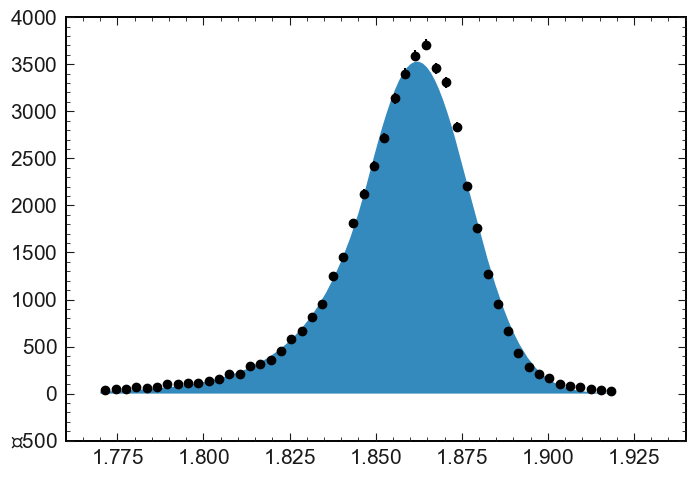

In [56]:
COST.visualize(m.values)

In [57]:
m.interactive()

In [58]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.221e+06                 │             Nfcn = 1236              │
│ EDM = 1.03e-05 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  49.43e3  │  0.22e3   │  -0.22e3   │   0.22e3   │         │         │       │
│ 1 │ alpha    │   0.945   │   0.010   │   -0.010   │   0.011    │         │         │       │
│ 2 │ n        │ 120.1110  │  0.0012   │  -0.0012   │   0.0012   │         │         │       │
│ 3 │ CB_mu    │  1.86201  │  0.00010  │  -0.00011  │  0.00011   │         │         │       │
│ 4 │ CB_sigma │ 15.23e-3  │  0.08e-3  │  -0.08e-3  │  0.08e-3   │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           s           │         alpha         │           n           │         CB_mu         │       CB_sigma        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.22e3  │  0.22e3   │  -0.010   │   0.011   │  -0.0012  │  0.0012   │ -0.11e-3  │  0.11e-3  │ -0.08e-3  │  0.08e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   False   │   False   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  4.85e+04   -0.0024  3.14e-05 -2.67e-05  2.83e-05 │
│    alpha │   -0.0024    0.0001 -6.37e-09 -6.64e-07  5.45e-07 │
│        n │  3.14e-05 -6.37e-09  1.56e-06  1.99e-11 -3.62e-12 │
│    CB_mu │ -2.67e-05 -6.64e-07  1.99e-11  1.07e-08 -4.56e-09 │
│ CB_sigma │  2.83e-05  5.45e-07 -3.62e-12 -4.56e-09  5.88e-09 │
└──────────┴───────────────────────────────────────────────────┘

In [59]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/CB_half_1M_1_vector_after_pi0veto.png'

In [60]:
this_plot_location = general_plot_location.replace("vector",mode)


In [61]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 49426


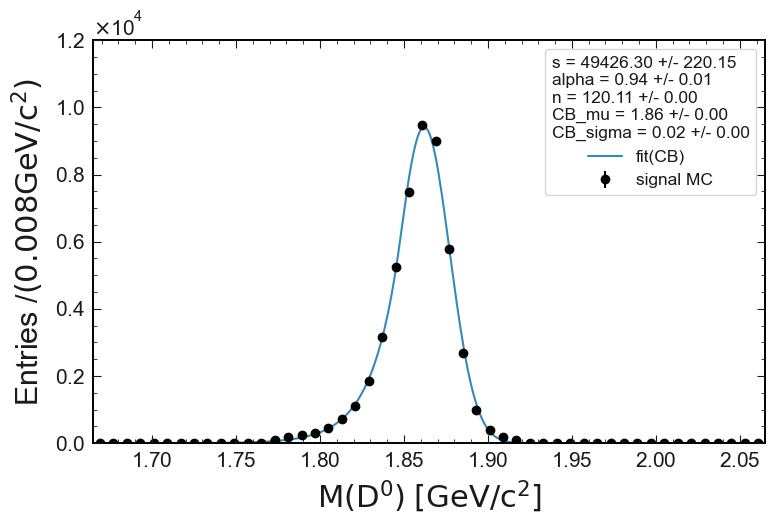

In [62]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")
# plt.plot(xm, crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")

plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB)")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### omega (CB)

In [126]:
base_filter = 'omega_rank_Dstp==1'
half_1M_1_omega = get_data(file=omega_file, tree='omega', base_filter=base_filter,variables=variables)

In [127]:
mode = 'omega'
dataset = pd.DataFrame(half_1M_1_omega)
dataset = dataset[(dataset['D0_M'] > 1.77) & (dataset['D0_M'] < 1.92)  ]['D0_M']

dataset.describe()

count    26243.000000
mean         1.856037
std          0.022653
min          1.770001
25%          1.843772
50%          1.858419
75%          1.870927
max          1.919988
Name: D0_M, dtype: float64

In [128]:
# PDF = crystalball_pdf

PDF = signal_crystalball

In [132]:
del m

In [133]:
# COST = cost.UnbinnedNLL(dataset, PDF)
# m = Minuit(COST, alpha=1.006, n=80, CB_mu=1.86,CB_sigma=0.012)

COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
# m = Minuit(COST, s=27000,alpha=1.0, n=80, CB_mu=1.86,CB_sigma=0.012)
m = Minuit(COST, s=26000,alpha=0.96, n=115, CB_mu=1.86,CB_sigma=0.018)

In [134]:
m.limits["n"]=(0,300)
m.limits["alpha"]=(0,5)
m.limits["CB_sigma"]=(0, 0.1)
m.limits["CB_mu"]=(1.80,1.90)

m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.076e+05                 │              Nfcn = 196              │
│ EDM = 28 (Goal: 0.0002)          │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  26.01e3  │  0.16e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.962   │   0.014   │            │            │    0    │    5    │       │
│ 2 │ n        │    117    │    24     │            │            │    0    │   300   │       │
│ 3 │ CB_mu    │  1.86001  │  0.00017  │            │            │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │ 18.00e-3  │  0.13e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  2.57e+04  -0.00484      44.4 -3.72e-05  3.07e-05 │
│    alpha │  -0.00484  0.000206   -0.0559 -1.58e-06  1.35e-06 │
│        n │      44.4   -0.0559       573  0.000198 -8.12e-05 │
│    CB_mu │ -3.72e-05 -1.58e-06  0.000198  2.92e-08 -1.33e-08 │
│ CB_sigma │  3.07e-05  1.35e-06 -8.12e-05 -1.33e-08  1.76e-08 │
└──────────┴───────────────────────────────────────────────────┘

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


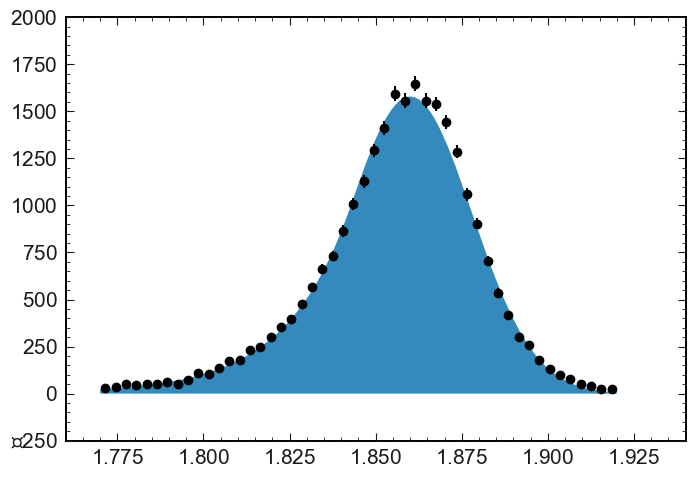

In [135]:
COST.visualize(m.values)

In [136]:
m.interactive()

In [137]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=27.97704869748085 edm_goal=0.0002 errordef=1.0 fval=-607576.4905891992 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=196 ngrad=0 reduced_chi2=nan time=0.0614275030020508>

In [138]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/CB_half_1M_1_vector_after_pi0veto.png'

In [139]:
this_plot_location = general_plot_location.replace("vector",mode)


In [140]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 26243


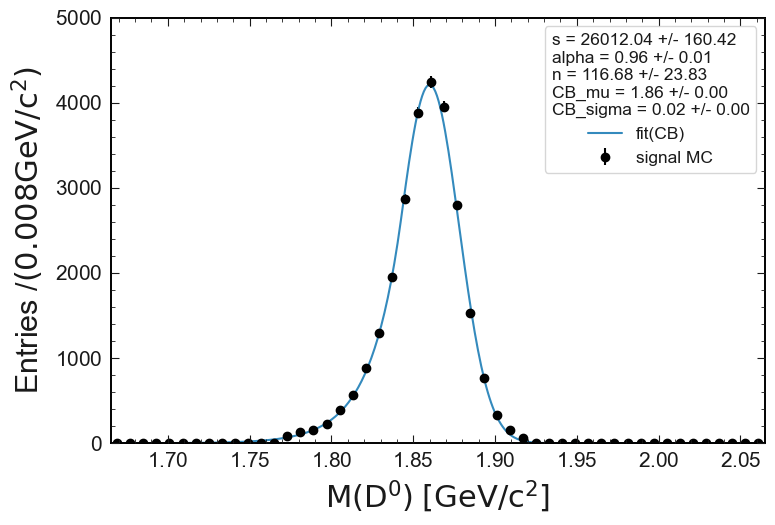

In [141]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, signal_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")
# plt.plot(xm, crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")

plt.plot(xm, signal_crystalball(xm, *m.values)[1]  * dx[0],label="fit(CB)")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [142]:
dataset.describe()

count    26243.000000
mean         1.856037
std          0.022653
min          1.770001
25%          1.843772
50%          1.858419
75%          1.870927
max          1.919988
Name: D0_M, dtype: float64

In [143]:
half_1M_1_omega.describe()

,D0_M
count,27037.000000
mean,1.855214
std,0.030444
min,1.665790
25%,1.843014
50%,1.858267
75%,1.871200
max,2.063333


## Extended

### phi(CB + Gaussian)

In [177]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [178]:
dataset = half_1M_1_phi['D0_M']

In [179]:
PDF = same_mu_extended_gauss_crystalball

mode = 'phi'
# dataset = half_1M_1_phi['D0_M']
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=3000, alpha=1, n=9, CB_sigma=0.05, mu=1.86, sigma=0.05)


In [180]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.3e+05                   │              Nfcn = 279              │
│ EDM = 4.46e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.43e3  │  0.20e3   │            │            │    0    │         │       │
│ 1 │ s2       │    860    │    70     │            │            │    0    │         │       │
│ 2 │ alpha    │   1.005   │   0.025   │            │            │    0    │         │       │
│ 3 │ n        │    9.3    │    1.1    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0687   │  0.0033   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.12e+04  -3.7e+03     0.246     -13.8   0.00208 -0.000511    0.0699 │
│       s2 │  -3.7e+03  4.65e+03    -0.145      9.91  -0.00205  0.000392   -0.0793 │
│    alpha │     0.246    -0.145  0.000612   -0.0232  1.47e-06 -1.91e-06 -2.67e-05 │
│        n │     -13.8      9.91   -0.0232      1.28 -2.99e-05  5.01e-05   0.00194 │
│ CB_sigma │   0.00208  -0.00205  1.47e-06 -2.99e-05  9.91e-09 -7.26e-09  3.43e-08 │
│       mu │ -0.000511  0.000392 -1.91e-06  5.01e-05 -7.26e-09  1.38e-08  3.42e-08 │
│    sigma │    0.0699   -0.0793 -2.67e-05   0.00194  3.43e-08  3.42e-08  1.09e-05 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

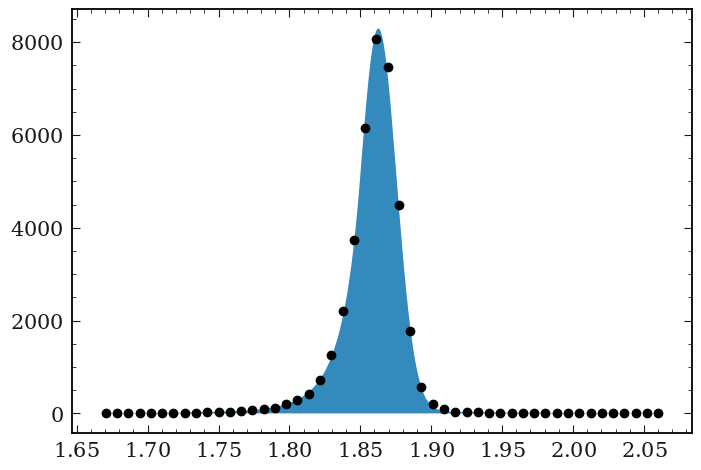

In [181]:
COST.visualize(m.values)

In [182]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.3e+05                   │             Nfcn = 1446              │
│ EDM = 4.46e-05 (Goal: 0.0002)    │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.43e3  │  0.20e3   │  -0.20e3   │   0.20e3   │    0    │         │       │
│ 1 │ s2       │    860    │    70     │    -70     │     70     │    0    │         │       │
│ 2 │ alpha    │   1.005   │   0.025   │   -0.024   │   0.025    │    0    │         │       │
│ 3 │ n        │    9.3    │    1.1    │    -1.0    │    1.3     │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0687   │  0.0033   │  -0.0033   │   0.0032   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.2e3   │   0.2e3   │    -70    │    70     │  -0.024   │   0.025   │   -1.0    │    1.3    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.12e-3  │  -0.0033  │  0.0032   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.12e+04  -3.7e+03     0.246     -13.8   0.00208 -0.000511    0.0699 │
│       s2 │  -3.7e+03  4.65e+03    -0.145      9.91  -0.00205  0.000392  

In [183]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/Gauss_CB_half_1M_1_vector_after_pi0veto.png'

In [184]:
this_plot_location = general_plot_location.replace("vector",mode)


In [185]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 38289


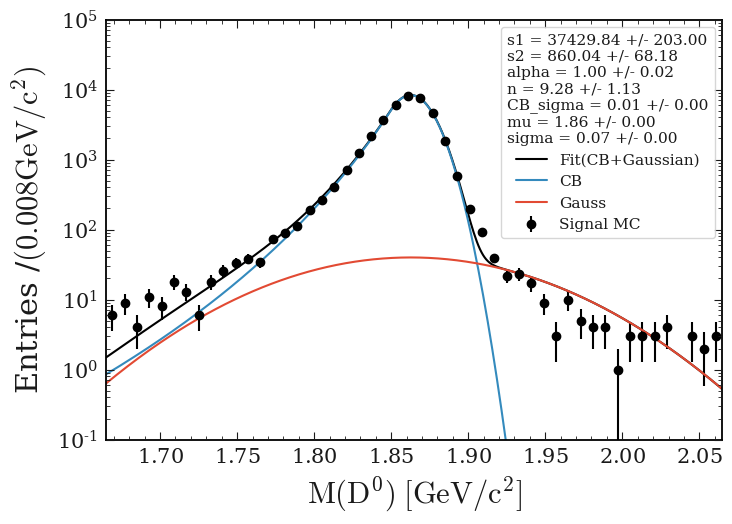

In [189]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2_serif')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="Signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="Fit(CB+Gaussian)",color='black')


plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values["alpha"], m.values["n"], m.values["mu"], m.values["CB_sigma"]) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))